In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
a = np.array(((np.nan, 1 , 2, 4), (1, 2, 3, 4)))

In [8]:
a[~np.any(np.isnan(a), 1)]

array([[1., 2., 3., 4.]])

#### 1. Load array

In [3]:
name = "harness_arc_challenge_25"
arr = np.load(f"{name}.npy", allow_pickle=True) 
print(arr.shape)

(5453316, 4)


#### 2. Remove all zero rows

In [17]:
arr[arr[:,0] == "notstoic__PygmalionCoT-7b"]

array([['notstoic__PygmalionCoT-7b', 0,
        'Question: Many stars can be seen in the sky at night. Which statement best explains why the Sun appears brighter than the stars seen in the night sky?\nAnswer: The Sun is closer to Earth than the stars seen in the night sky.\n\nQuestion: Which process in plants is most similar to sexual reproduction in vertebrates?\nAnswer: cross-pollination\n\nQuestion: John was using his mp3 player when it suddenly stopped working. What is the first thing John should do to try correcting the problem?\nAnswer: recharge the battery\n\nQuestion: The heart is the major organ of the circulatory system. Which part of the body is responsible for delivering de-oxygenated blood to the heart?\nAnswer: veins\n\nQuestion: Which is true about reproduction for both an amoeba and a paramecium?\nAnswer: A paramecium can conjugate, but an amoeba cannot.\n\nQuestion: A student plans to design a new toothpaste tube that will give the same amount of toothpaste every time 

In [12]:
arr = arr[~np.all(arr == 0, axis=1)]
print(arr.shape)

(5453316, 4)


##### Show example first row

In [4]:
arr[0]

array(['notstoic__PygmalionCoT-7b', 0,
       "Question: Mr. Bodhi is transporting some animals using a yacht across a river. He has 20 cows, 15 foxes and three times as many zebras as foxes. To balance the yacht to ensure a smooth sail across the river, the total number of animals in the yacht needs to be 100. If he decides to add sheep to the yacht to make the yacht sail-worthy, how many sheep did he add to the yacht?\nAnswer: The number of cows and foxes in the yacht is 20+15 = <<20+15=35>>35\nMr. Bodhi also has three times as many zebras as foxes in the yacht, equal to 3*15 = <<3*15=45>>45 zebras.\nThe number of animals in the yacht so far is 35+45 = <<35+45=80>>80\nTo balance the yacht, Mr. Bodhi needs to add 100-80= <<100-80=20>>20 sheep\n#### 20\n\nQuestion: Manny is making lasagna for dinner with his four friends, Lisa, Raphael, Aaron, and Kai. He needs to know how many pieces to cut the lasagna into to serve it. Manny only wants one piece. Aaron doesn't like lasagna much and w

#### 3. Remove prompt column

In [5]:
arr = np.delete(arr, 2, 1)
print(arr.shape)

(5736331, 3)


##### Show example first row

In [6]:
arr[0]

array(['notstoic__PygmalionCoT-7b', 0, False], dtype=object)

#### 4. Add benchmark name to all rows

In [7]:
arr = np.insert(arr, 0, name, axis=1)
print(arr.shape)

(5736331, 4)


##### Show example first row

In [8]:
arr[0]

array(['gsm8k', 'notstoic__PygmalionCoT-7b', 0, False], dtype=object)

#### Save cleaned array

In [ ]:
np.save(f"{name}_clean.npy", arr)

#### 5. Item correlation analysis

In [ ]:
# Load array
arr = np.load("gsm8k_clean.npy", allow_pickle=True)

# Pre-allocate correlation input array (shape is num items, num models)
m = np.zeros((max(arr[:,2]), len(np.unique(arr[:,1]))))

# Make rows in correlation array
for i in range(max(arr[:,2])):
    m[i, :] = arr[arr[:,2] == i, 3]

# Compute correlation between items
corrs = metrics.pairwise_distances(m, metric='correlation')

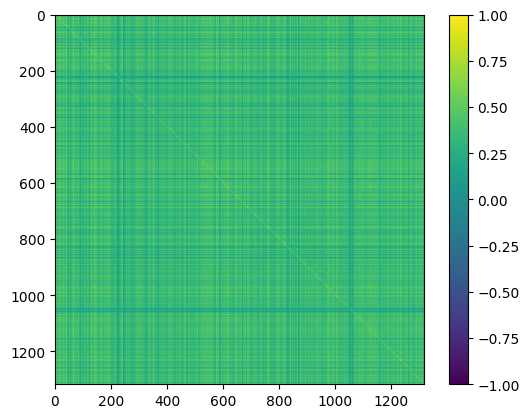

In [74]:
# Remove faulty row and column 42
corrs[42] = 0
corrs[:,42] = 0

# Plot correlation matrix
plt.imshow(1-corrs, vmin=-1, vmax=1)
plt.colorbar()